In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('data/flight_delays_train.csv')

In [3]:
display(train.head())
display(train.info())
display(train['dep_delayed_15min'].value_counts(normalize=True))

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Month              100000 non-null  object
 1   DayofMonth         100000 non-null  object
 2   DayOfWeek          100000 non-null  object
 3   DepTime            100000 non-null  int64 
 4   UniqueCarrier      100000 non-null  object
 5   Origin             100000 non-null  object
 6   Dest               100000 non-null  object
 7   Distance           100000 non-null  int64 
 8   dep_delayed_15min  100000 non-null  object
dtypes: int64(2), object(7)
memory usage: 6.9+ MB


None

dep_delayed_15min
N    0.80956
Y    0.19044
Name: proportion, dtype: float64

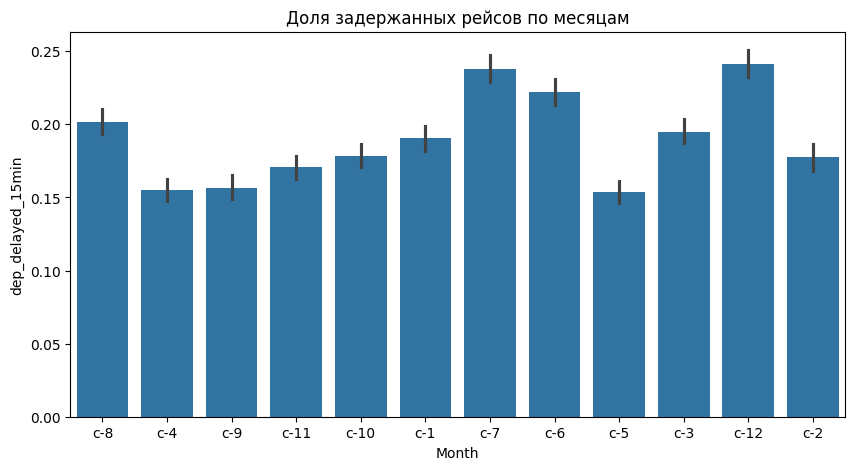

In [7]:
# Анализ влияния месяца на задержки рейсов
plt.figure(figsize=(10, 5))
sns.barplot(
    x='Month',
    y='dep_delayed_15min',
    data=train.replace({'dep_delayed_15min': {'Y': 1, 'N': 0}}),
    estimator=lambda x: sum(x) / len(x)
)

plt.title('Доля задержанных рейсов по месяцам')
plt.show()

### Вывод по анализу влияния месяца на задержки рейсов

На графике видно, что доля задержанных рейсов заметно различается в зависимости от месяца. Наибольший процент задержек наблюдается в месяцах c-7 и c-12, что может быть связано с сезонными факторами: летние отпуска, высокий пассажиропоток, а также зимние праздники и погодные условия. В некоторых месяцах (например, c-4, c-9, c-5) доля задержек минимальна. Это говорит о том, что сезонность существенно влияет на пунктуальность авиарейсов.

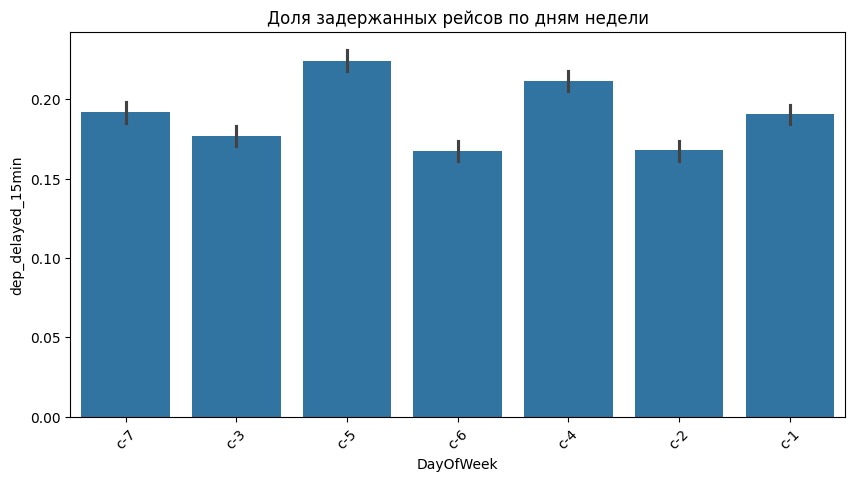

In [23]:
# Анализ влияния дня недели на задержки рейсов
plt.figure(figsize=(10, 5))
sns.barplot(
    x='DayOfWeek',
    y='dep_delayed_15min',
    data=train.replace({'dep_delayed_15min': {'Y': 1, 'N': 0}}),
    estimator=lambda x: sum(x) / len(x)
)

plt.title('Доля задержанных рейсов по дням недели')
plt.xticks(rotation=45)
plt.show()

### Вывод по анализу влияния дня недели на задержки рейсов

Наибольший процент задержек наблюдается в дни c-5 и c-4, что может быть связано с увеличением пассажиропотока в конце и начале рабочей недели. В остальные дни недели доля задержек ниже и примерно одинакова. Это говорит о том, что при планировании рейсов и путешествий стоит учитывать день недели, так как в определённые дни вероятность задержки выше.

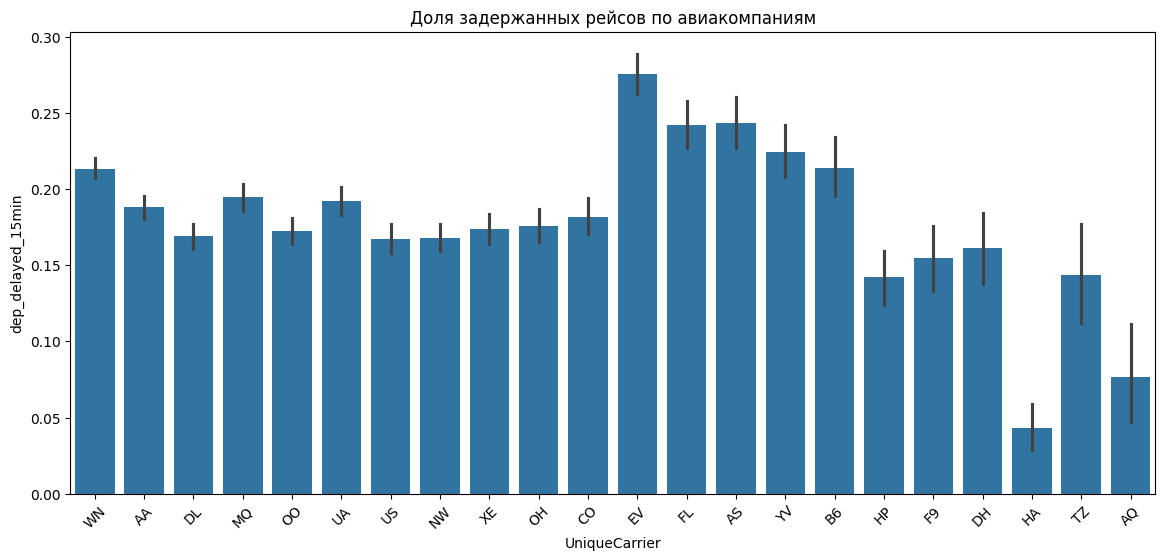

In [13]:
# Анализ влияния авиакомпании на задержки рейсов
plt.figure(figsize=(14, 6))
order = train['UniqueCarrier'].value_counts().index
sns.barplot(
    x='UniqueCarrier',
    y='dep_delayed_15min',
    data=train.replace({'dep_delayed_15min': {'Y': 1, 'N': 0}}),
    order=order,
    estimator=lambda x: sum(x) / len(x)
)

plt.title('Доля задержанных рейсов по авиакомпаниям')
plt.xticks(rotation=45)
plt.show()

### Вывод по анализу влияния авиакомпании на задержки рейсов

Некоторые перевозчики (например, EV, FL, AS, YV, B6) имеют заметно более высокий процент задержек по сравнению с остальными. В то же время у некоторых авиакомпаний (например, HA, AQ) задержки встречаются крайне редко. Это может быть связано с особенностями маршрутной сети, организацией работы, техническим состоянием флота или погодными условиями в регионах, где преимущественно работают эти авиакомпании. Таким образом, выбор авиакомпании может существенно влиять на вероятность задержки рейса.

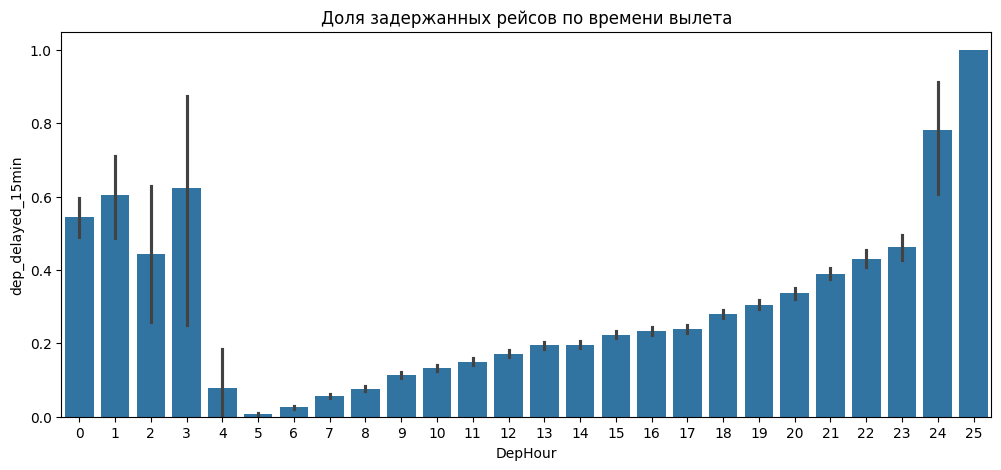

In [14]:
# Анализ влияния времени вылета (группировка по часам)
train['DepHour'] = train['DepTime'] // 100
plt.figure(figsize=(12, 5))
sns.barplot(
    x='DepHour',
    y='dep_delayed_15min',
    data=train.replace({'dep_delayed_15min': {'Y': 1, 'N': 0}}),
    estimator=lambda x: sum(x) / len(x)
)

plt.title('Доля задержанных рейсов по времени вылета')
plt.show()

### Вывод по анализу влияния времени вылета на задержки рейсов

Наибольшая доля задержек наблюдается в ночные и ранние утренние часы (0–4 и после 23 часов), а также в самом конце суток. В дневные и вечерние часы доля задержек постепенно увеличивается, что может быть связано с накоплением отклонений по расписанию в течение дня. Минимальная вероятность задержки — в утренние часы (5–8 часов), когда рейсы стартуют с "чистого листа". Это говорит о том, что время вылета — важный фактор при планировании путешествия: утренние рейсы обычно более пунктуальны.

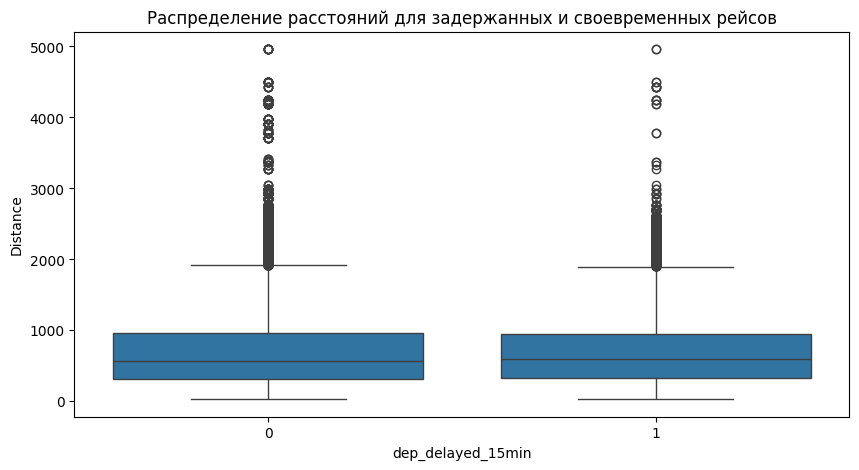

In [20]:
# Анализ влияния расстояния на задержки рейсов
plt.figure(figsize=(10, 5))
sns.boxplot(
    x='dep_delayed_15min',
    y='Distance',
    data=train.replace({'dep_delayed_15min': {'Y': 1, 'N': 0}})
)
plt.title('Распределение расстояний для задержанных и своевременных рейсов')
plt.show()

### Вывод по анализу влияния расстояния на задержки рейсов

На boxplot видно, что распределения расстояний для задержанных и своевременных рейсов очень похожи. Медианные значения и диапазоны расстояний практически совпадают, что говорит об отсутствии явной зависимости между длиной маршрута и вероятностью задержки рейса. Это означает, что фактор расстояния не оказывает существенного влияния на вероятность задержки: как короткие, так и длинные рейсы могут быть как задержанными, так и своевременными.